Pietro Servadio and Vasu Bansal

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks/IDL")

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10

import numpy as np

import matplotlib.pyplot as plt



In [11]:
# Parameters of the input images
quad_img_size = 32
image_dimensions = 3

# fliter sizes
no_fils_1 = 200
no_fils_2 = 200

# kernel sizes
kernel1 = 3
kernel2 = 6

#padding sizes
pad1="valid"
pad2="valid"

#activation paramters
activation1="relu"
activation2="relu"

# Parameters of training
train_steps = 4000

170498071/170498071 [==============================] - 3s 0us/step
deer


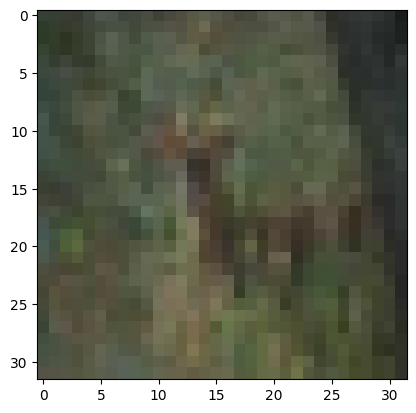

In [5]:
# just data stuff
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print(labels[train_labels[10][0]])
# print(train_labels[0])
plt.imshow(train_images[10], cmap="Greys_r")

train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, quad_img_size, quad_img_size, image_dimensions]).astype(np.float32) / 255., train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, quad_img_size, quad_img_size, image_dimensions]).astype(np.float32) / 255., test_labels.astype(np.int32))).batch(128)

In [6]:
model = Sequential(
    [
        keras.Input(shape=(quad_img_size, quad_img_size, image_dimensions)),
        layers.Conv2D(no_fils_1, kernel1, padding=pad1, activation=activation1),
        layers.MaxPool2D(pool_size=(2, 2)),
        # layers.Dropout(.1),
        layers.Conv2D(no_fils_2, kernel2, padding=pad2, activation=activation2),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(256,activation='relu'),
        layers.Dropout(.5),
        layers.Dense(10,activation='softmax'),
    ])

In [7]:

# Instantiate a loss function.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()


In [8]:
def train(model, max_steps):

      print('Start of training')
      acc = tf.keras.metrics.SparseCategoricalAccuracy()

      # Iterate over the batches of the dataset.
      for step, (x_batch_train, y_batch_train) in enumerate(train_data):
        if step > max_steps:
          break
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables autodifferentiation.
        with tf.GradientTape() as tape:

              # Run the forward pass of the layer.
              # The operations that the layer applies
              # to its inputs are going to be recorded
              # on the GradientTape.
              logits = model(x_batch_train, training=True)  # Logits for this minibatch

              # Compute the loss value for this minibatch.
              loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        acc(y_batch_train, logits)

        # Log every 200 batches.
        if step % 200 == 0:
            print("Loss: {} Accuracy: {}".format(loss_value, acc.result()))

In [12]:
train(model, max_steps=train_steps)

Start of training
Loss: 0.6737180352210999 Accuracy: 0.765625
Loss: 0.625118613243103 Accuracy: 0.7473180890083313
Loss: 0.5616989135742188 Accuracy: 0.7437987327575684
Loss: 0.5836949348449707 Accuracy: 0.7514047622680664
Loss: 0.533237874507904 Accuracy: 0.7539831399917603
Loss: 0.588994026184082 Accuracy: 0.7596772909164429
Loss: 0.6932772397994995 Accuracy: 0.7619999647140503
Loss: 0.838963508605957 Accuracy: 0.7658105492591858
Loss: 0.7080565690994263 Accuracy: 0.767910897731781
Loss: 0.6389782428741455 Accuracy: 0.7718550562858582
Loss: 0.44743162393569946 Accuracy: 0.7741003632545471
Loss: 0.5113519430160522 Accuracy: 0.7775678038597107
Loss: 0.36190563440322876 Accuracy: 0.7805172204971313
Loss: 0.6368115544319153 Accuracy: 0.7835046648979187
Loss: 0.41979479789733887 Accuracy: 0.786357581615448
Loss: 0.560545802116394 Accuracy: 0.7892947196960449
Loss: 0.385636568069458 Accuracy: 0.7920624017715454
Loss: 0.5250662565231323 Accuracy: 0.7949069142341614
Loss: 0.46537595987319946

In [13]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
# test_acc_metric = tf.keras.metrics.CategoricalAccuracy()

for _, (test_images, test_labels) in enumerate(test_data):
    test_acc_metric(test_labels, model(test_images, training=False))

test_acc = test_acc_metric.result()
test_acc_metric.reset_states()

# print("Test acc: {}".format(test_acc_metric.result()))
print("Test acc: {}".format(test_acc))

Test acc: 0.73580002784729
